In [2]:
import json
import pandas as pd
data = []
rows_list = []
max_number_of_books = 100000
books = pd.DataFrame(data = data, columns=[
    'text_reviews_count', 'average_rating',
    'similar_books', 'authors', 'publisher',
    'num_pages', 'publication_year','book_id',
    'ratings_count', 'title'
])
count = 0
with open('goodreads_books.json',"r") as jsonfile:
    while True:
        if count >= max_number_of_books:
            break
        data = jsonfile.readline()
        if not data:
            break
        data = json.loads(data)
 
        try:
            text_reviews_count = int(data['text_reviews_count'])
            average_rating = float(data['average_rating'])
            publication_year = int(data['publication_year'])
            num_pages = int(data['num_pages'])
            ratings_count = int(data['ratings_count'])
            book_id = int(data['book_id'])
        except Exception:
            continue

        dict1 = {
        'text_reviews_count':text_reviews_count,
        'average_rating': average_rating,
        'similar_books': data['similar_books'],
        'authors': data['authors'],
        'publisher': data['publisher'],
        'num_pages': num_pages,
        'publication_year': publication_year,
        'book_id': book_id,
        'ratings_count': ratings_count,
        'title': data['title']
        }
        count +=1
        rows_list.append(dict1)

books = pd.DataFrame(rows_list)
print(books.head())

   text_reviews_count  average_rating  \
0                   1            4.00   
1                   7            4.03   
2                3282            3.49   
3                   7            4.13   
4                   6            4.22   

                                       similar_books  \
0                                                 []   
1  [19997, 828466, 1569323, 425389, 1176674, 2627...   
2  [6604176, 6054190, 2285777, 82641, 7569453, 70...   
3                                                 []   
4  [948696, 439885, 274955, 12978730, 372986, 216...   

                                  authors               publisher  num_pages  \
0   [{'author_id': '604031', 'role': ''}]      St. Martin's Press        256   
1    [{'author_id': '10333', 'role': ''}]  Nelson Doubleday, Inc.        600   
2     [{'author_id': '9212', 'role': ''}]             Atria Books        368   
3  [{'author_id': '3041852', 'role': ''}]    Yesterday's Classics        162   
4    [{'author_i

In [2]:
books.dtypes

text_reviews_count      int64
average_rating        float64
similar_books          object
authors                object
publisher              object
num_pages               int64
publication_year        int64
book_id                object
ratings_count           int64
title                  object
dtype: object

In [15]:
# cols = ['average_rating','text_reviews_count']
# mask = books[cols].applymap(lambda x: isinstance(x, (int, float)))
# books[cols] = books[cols].where(mask)

/tmp/ipykernel_16787/2885143642.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = books[cols].applymap(lambda x: isinstance(x, (int, float)))


In [2]:
books['average_rating'].describe()

count    100000.000000
mean          3.849083
std           0.513926
min           0.000000
25%           3.620000
50%           3.890000
75%           4.130000
max           5.000000
Name: average_rating, dtype: float64

In [3]:
books['text_reviews_count'].describe()

count    100000.000000
mean         36.794150
std         487.340868
min           0.000000
25%           2.000000
50%           4.000000
75%          14.000000
max       86946.000000
Name: text_reviews_count, dtype: float64

In [4]:
books['publication_year'].describe()

count    100000.000000
mean       2008.918080
std         351.767159
min           0.000000
25%        2004.000000
50%        2011.000000
75%        2014.000000
max       65535.000000
Name: publication_year, dtype: float64

In [3]:
from multiprocessing import Pool
import datetime
number_of_reviews = 50000
rows_list = []
interactions = pd.DataFrame()
number_of_lines_per_patch = 16
count = 0
all_books = list(books['book_id'])
def process_book(review:dict):
    # review_keys = review.keys()

    user_id = review['user_id']
    book_id = review['book_id']
    # is_read = review['is_read']
    rating = review['rating']
    date_added = review['date_added']
    n_votes = review['n_votes']
    n_comments = review['n_comments']    
    try:
        book_id = int(book_id)
    except Exception:
        return None
    if book_id in all_books:
        try:
            # user_id = int(user_id)
            # is_read = int(is_read)
            rating = int(rating)
            # is_reviewed = int(is_reviewed)
            n_votes = int(n_votes)
            n_comments = int(n_comments)
            # date_added = datetime.strptime(date_added, '%a %b %d %H:%M:%S ')
        except Exception:
            return None
        # if is_read == 0: ## if is_read==0 means that the rating is always 0 by default so we don't consider it
        #     return None
        return {
                'book_id':book_id,
                'user_id':user_id,
                # 'is_read': is_read,
                'rating': rating,
                'date_added': date_added,
                'n_votes': n_votes,
                'n_comments': n_comments
            }
        

with open('goodreads_reviews_dedup.json',"r") as jsonfile:
    with Pool(number_of_lines_per_patch) as process_pool:
        while True:
            lines = [json.loads(next(jsonfile)) for _ in range(number_of_lines_per_patch)]
            # line = jsonfile.readline()
            if len(lines) == 0 or count>number_of_reviews:
                break

            results = process_pool.map(process_book,lines)
            results = [r for r in results if r is not None]
            rows_list.extend(results)
            
            count += len(results)
            if count%1000 == 0:
                print(count)

interactions = pd.DataFrame(rows_list)        

0
1000
2000
2000
4000
5000
7000
8000
9000
11000
11000
12000
15000
16000
17000
18000
21000
21000
23000
25000
26000
27000
28000
29000
32000
32000
33000
34000
34000
35000
35000
36000
38000
39000
39000
39000
40000
41000
41000
41000
42000
43000
44000
46000
47000
47000
49000
49000
49000
49000
50000


In [6]:
interactions.describe()

,book_id,rating,n_votes,n_comments
count,5.000100e+04,50001.000000,50001.000000,50001.000000
mean,1.209959e+07,3.794104,1.225815,0.355453
std,9.476707e+06,1.219929,10.307430,2.776003
min,4.210000e+02,0.000000,-1.000000,0.000000
25%,2.168860e+06,3.000000,0.000000,0.000000
50%,1.229144e+07,4.000000,0.000000,0.000000
75%,1.845806e+07,5.000000,1.000000,0.000000
max,3.638080e+07,5.000000,1096.000000,285.000000


In [11]:
rows_list[10000]

{'book_id': 12609433,
 'user_id': '84333f5def09812528f3bf1ed941f1a6',
 'rating': 3,
 'date_added': 'Thu Nov 10 22:05:09 -0800 2016',
 'n_votes': 0,
 'n_comments': 0}

In [4]:
all_books = interactions['book_id'].unique()
print(len(all_books))
all_users = interactions['user_id'].unique()
print(len(all_users))

18383
9290


In [26]:
all_books = interactions['book_id'].unique()
book_to_users = {}
for abook in all_books:
    book_to_users[abook] = set()
# book_to_users = dict.fromkeys(all_books,set())
print(book_to_users[835])
for i in range(len(interactions)):
    book_to_users[interactions.loc[i,'book_id']].add(interactions.loc[i,'user_id'])
print(book_to_users[835])

set()
{'8842281e1d1347389f2ab93d60773d4d'}


In [27]:
print(len(book_to_users.keys()))

18383


In [28]:
print(len(interactions.loc[interactions['book_id'] == 19398490]))

17


In [29]:
print(book_to_users.keys())
print(book_to_users[19398490])
print(book_to_users[835])

dict_keys([19398490, 12969594, 8664353, 6452796, 178186, 14497, 18122, 108905, 2052, 835, 830, 18306845, 15507958, 7260188, 1007501, 23006161, 32620360, 30364190, 33932353, 32734331, 31450633, 28963772, 27872890, 25906956, 26247873, 27999771, 26062606, 28435457, 27212266, 25065523, 23518092, 23437291, 22057891, 23155597, 23016520, 22926494, 18698511, 19286623, 22605502, 22021942, 21981841, 21805408, 18713426, 15938710, 19292809, 18694097, 18745190, 18681804, 18631504, 17993595, 18072325, 12579262, 18269958, 17798287, 13122475, 17673010, 17449965, 17346804, 11873473, 17284642, 13597930, 16081272, 16727308, 16151178, 7893098, 6717244, 100286, 5060378, 110494, 13446443, 13626269, 77203, 18049017, 16074339, 15926775, 16030663, 8621462, 11254850, 10576365, 287861, 14578407, 6716418, 8577678, 9879625, 13372690, 13548456, 29780253, 10572, 21491731, 18458057, 17311772, 17325147, 17257990, 12291438, 19161852, 847106, 25251757, 52407, 52403, 25243735, 16638377, 647955, 23208604, 535225, 8683812,

In [10]:

for book in book_to_users.keys():
    if len(book_to_users[book]) < 2:
        print('here')
        del book_to_users[book]
print(len(book_to_users.keys()))     

9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290
9290


In [27]:
!!pip install matplotlib
!!pip install scipy

['Collecting scipy',
 '  Downloading scipy-1.12.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/60.4 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b20.5/60.4 kB\x1b \x1b584.7 kB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b60.4/60.4 kB\x1b \x1b960.0 kB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: numpy<1.29.0,>=1.22.4 in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (from scipy) (1.26.2)',
 'Downloading scipy-1.12.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.8 MB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/37.8 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.1/37.8 MB\x1b \x1b4.7 MB/s\x1b eta \x1b0:00:08\x1b',
 '\x1

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

In [31]:
from tqdm import tqdm
G = nx.Graph()
for index1,i in tqdm(enumerate(book_to_users.keys())):
    edges = []
    for index2,j in enumerate(book_to_users.keys()):
        if index1 >= index2:
            continue
        if len(book_to_users[i].intersection(book_to_users[j])) != 0:
            edges.append((i,j))
    G.add_edges_from(edges)

0it [00:00, ?it/s]

18383it [00:37, 489.43it/s] 


In [36]:
print(nx.density(G))
print(G.number_of_edges())
print(G.number_of_nodes())
print(G.number_of_edges()/G.number_of_nodes())
# print(nx.diameter(G))
# print(list(nx.eulerian_path(G)))
# print(list(nx.find_cliques(G)))

0.0036562833605527077
577895
17780
32.502530933633295


In [37]:
print('number of connected components')
print(len(list(nx.connected_components(G))))

number of connected components
185


In [43]:
print(nx.average_clustering(G))

0.814464116722324


In [ ]:
print(nx.average_shortest_path_length(G))

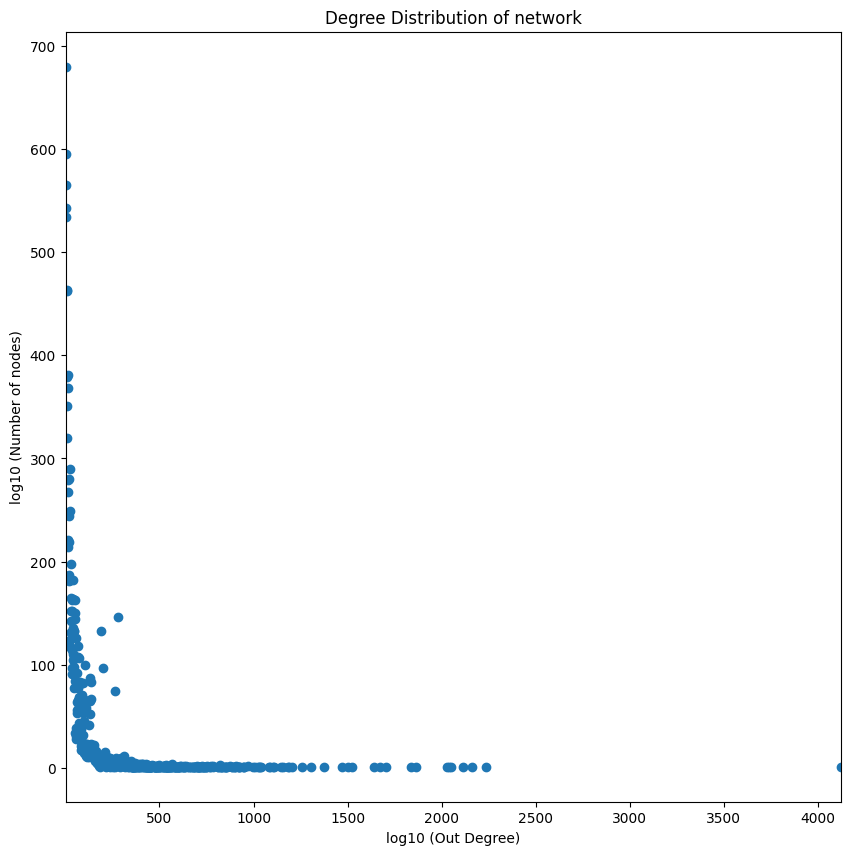

In [41]:
import numpy as np
out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

plt.figure(figsize=(10,10))
plt.xlim(min(x), max(x))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(x, y, 'o')

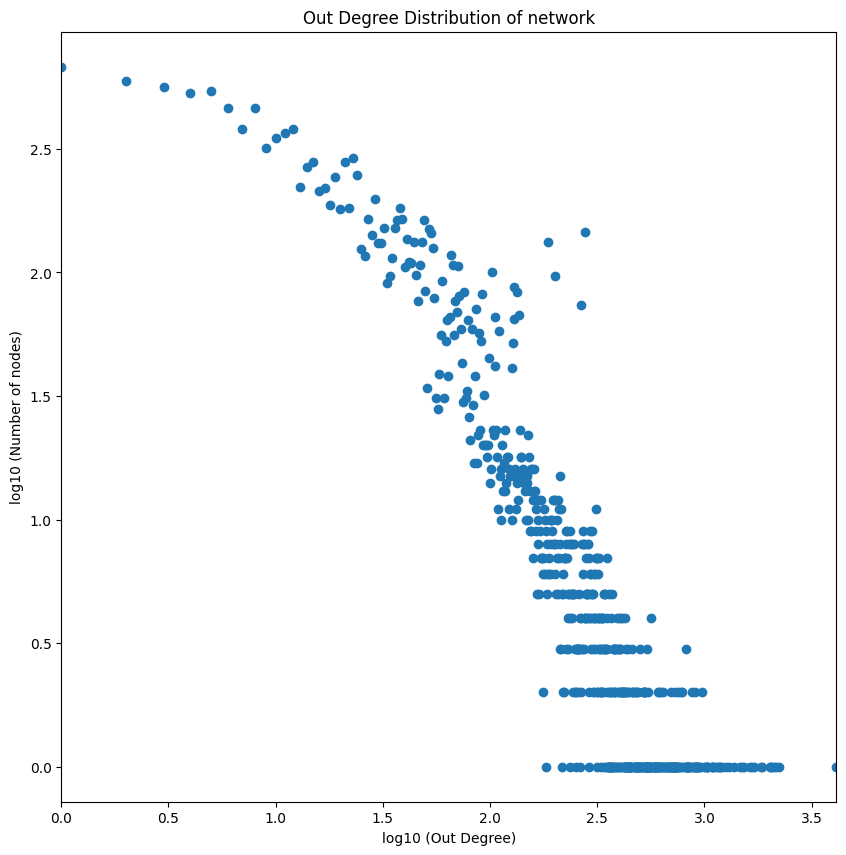

In [39]:
## degree Distribution
import numpy as np
out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(logx, logy, 'o')

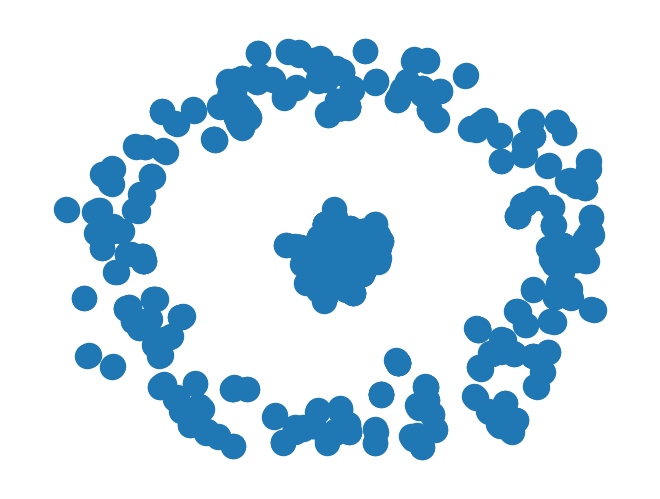

In [33]:
nx.draw_spring(G, with_labels=False)
plt.show()

In [22]:
edge_list = [(1,2),(2,3),(4,5),(1,3),(1,10),(5,3),(2,7),(7,1),(5,9)]

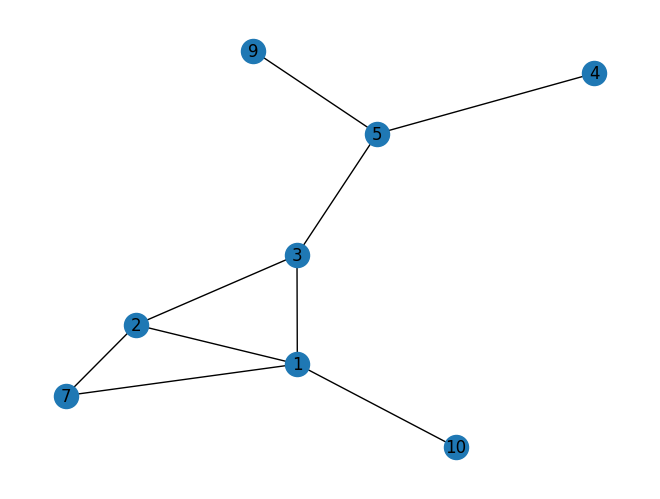

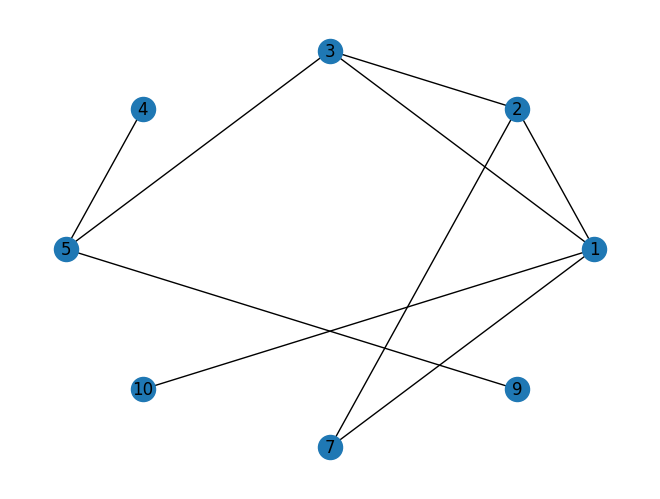

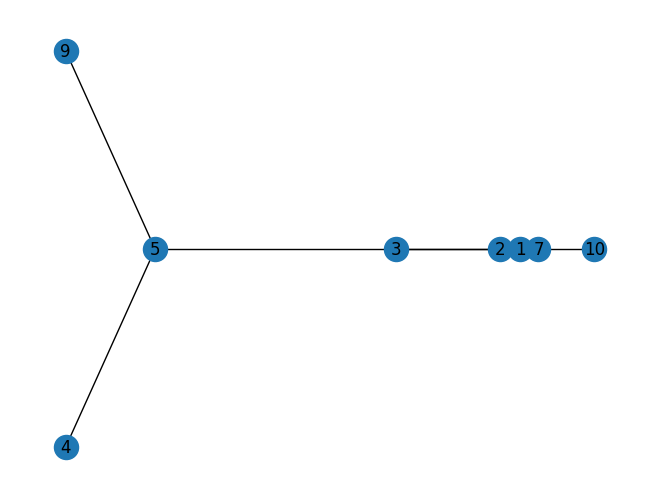

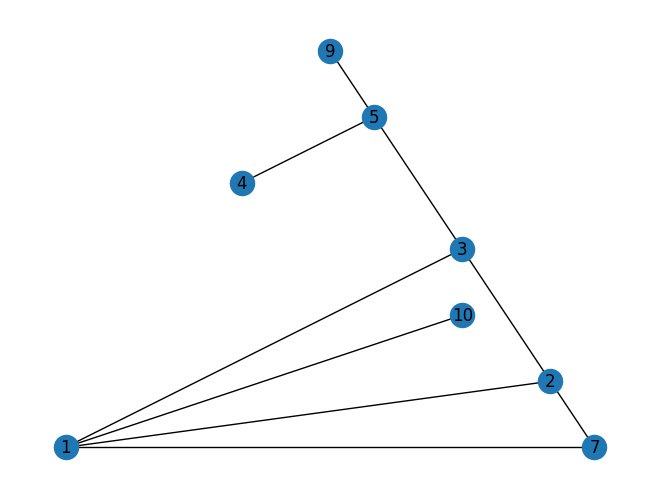

In [34]:
G = nx.from_edgelist(edgelist=edge_list)
G.add_edges_from(edge_list)
nx.draw_spring(G, with_labels=True)
plt.show()
nx.draw_circular(G, with_labels=True)
plt.show()
nx.draw_spectral(G, with_labels=True)
plt.show()
nx.draw_planar(G,with_labels=True)
plt.show()

In [26]:
print(nx.adjacency_matrix(G))

ModuleNotFoundError: No module named 'scipy'

In [35]:
print(dict(G.degree))

{1: 4, 2: 3, 3: 3, 4: 1, 5: 3, 10: 1, 7: 2, 9: 1}


In [42]:
print(nx.shortest_path(G))

{1: {1: [1], 2: [1, 2], 3: [1, 3], 10: [1, 10], 7: [1, 7], 5: [1, 3, 5], 4: [1, 3, 5, 4], 9: [1, 3, 5, 9]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 7: [2, 7], 10: [2, 1, 10], 5: [2, 3, 5], 4: [2, 3, 5, 4], 9: [2, 3, 5, 9]}, 3: {3: [3], 2: [3, 2], 1: [3, 1], 5: [3, 5], 7: [3, 2, 7], 10: [3, 1, 10], 4: [3, 5, 4], 9: [3, 5, 9]}, 4: {4: [4], 5: [4, 5], 3: [4, 5, 3], 9: [4, 5, 9], 2: [4, 5, 3, 2], 1: [4, 5, 3, 1], 7: [4, 5, 3, 2, 7], 10: [4, 5, 3, 1, 10]}, 5: {5: [5], 4: [5, 4], 3: [5, 3], 9: [5, 9], 2: [5, 3, 2], 1: [5, 3, 1], 7: [5, 3, 2, 7], 10: [5, 3, 1, 10]}, 10: {10: [10], 1: [10, 1], 2: [10, 1, 2], 3: [10, 1, 3], 7: [10, 1, 7], 5: [10, 1, 3, 5], 4: [10, 1, 3, 5, 4], 9: [10, 1, 3, 5, 9]}, 7: {7: [7], 2: [7, 2], 1: [7, 1], 3: [7, 2, 3], 10: [7, 1, 10], 5: [7, 2, 3, 5], 4: [7, 2, 3, 5, 4], 9: [7, 2, 3, 5, 9]}, 9: {9: [9], 5: [9, 5], 4: [9, 5, 4], 3: [9, 5, 3], 2: [9, 5, 3, 2], 1: [9, 5, 3, 1], 7: [9, 5, 3, 2, 7], 10: [9, 5, 3, 1, 10]}}


In [43]:
print(nx.degree_centrality(G))

{1: 0.5714285714285714, 2: 0.42857142857142855, 3: 0.42857142857142855, 4: 0.14285714285714285, 5: 0.42857142857142855, 10: 0.14285714285714285, 7: 0.2857142857142857, 9: 0.14285714285714285}


In [44]:
print(nx.closeness_centrality(G))

{1: 0.5833333333333334, 2: 0.5384615384615384, 3: 0.6363636363636364, 4: 0.3684210526315789, 5: 0.5384615384615384, 10: 0.3888888888888889, 7: 0.4117647058823529, 9: 0.3684210526315789}


In [45]:
print(nx.betweenness_centrality(G))

{1: 0.38095238095238093, 2: 0.09523809523809523, 3: 0.5714285714285714, 4: 0.0, 5: 0.5238095238095237, 10: 0.0, 7: 0.0, 9: 0.0}


In [51]:
print(list(nx.bridges(G)))

[(1, 10), (3, 5), (4, 5), (5, 9)]


In [52]:
print(list(nx.connected_components(G)))

[{1, 2, 3, 4, 5, 7, 9, 10}]
